In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import the data
# Data Ingestion steps
df =pd.read_csv('data/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
### No missing data present in the Dataset

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
### checked for duplicated rows
df.duplicated().sum()

1

In [8]:
# We have only 1 duplicate row 

In [9]:
## drop the duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# segregate numerical and categoricl columns
numerical_columns = df.columns[df.dtypes!= 'object']
categorical_columns = df.columns[df.dtypes== 'object']
print("numerical_columns = ", numerical_columns)
print('categorical_columns = ',categorical_columns)


numerical_columns =  Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
categorical_columns =  Index(['sex', 'smoker', 'region'], dtype='object')


In [11]:
df['sex'].value_counts().reset_index()

,sex,count
0,male,675
1,female,662


In [12]:
df['region'].value_counts().reset_index()

,region,count
0,southeast,364
1,southwest,325
2,northwest,324
3,northeast,324


Text(0, 0.5, 'Count')

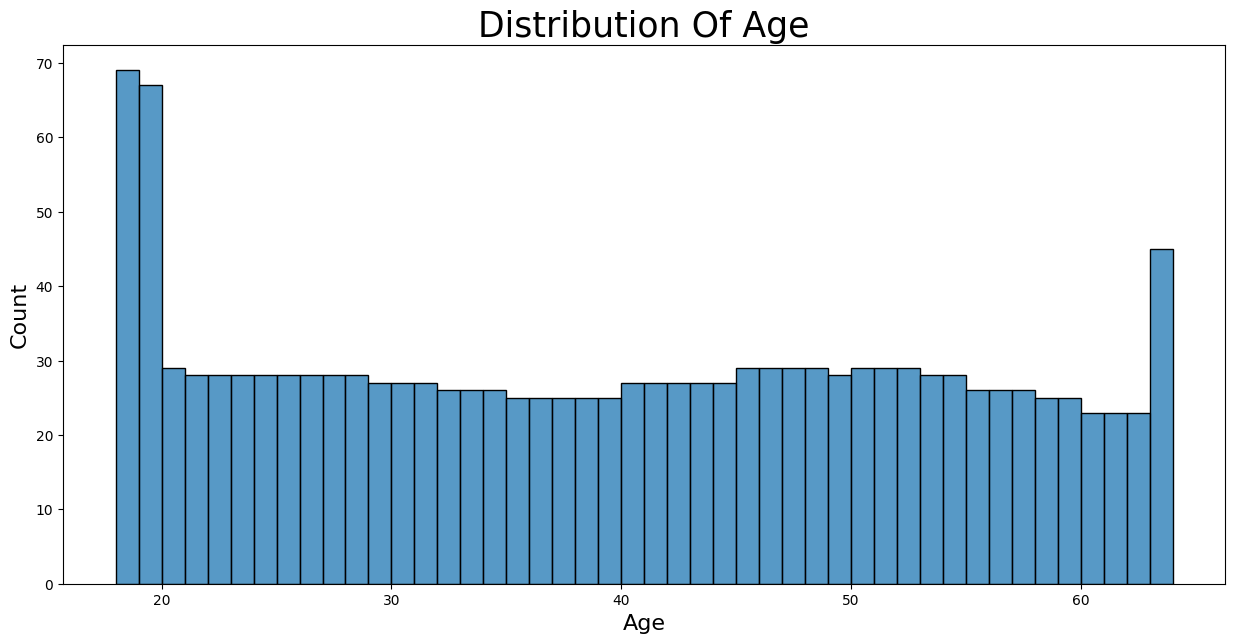

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,7))
plt.title("Distribution Of Age",fontsize=25)
bp1=sns.histplot(x='age',data=df,bins=46)
bp1.set_xlabel("Age", fontsize=16)
bp1.set_ylabel("Count", fontsize=16)

C:\Users\Indra\AppData\Local\Temp\ipykernel_4792\1311172832.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Frequency')

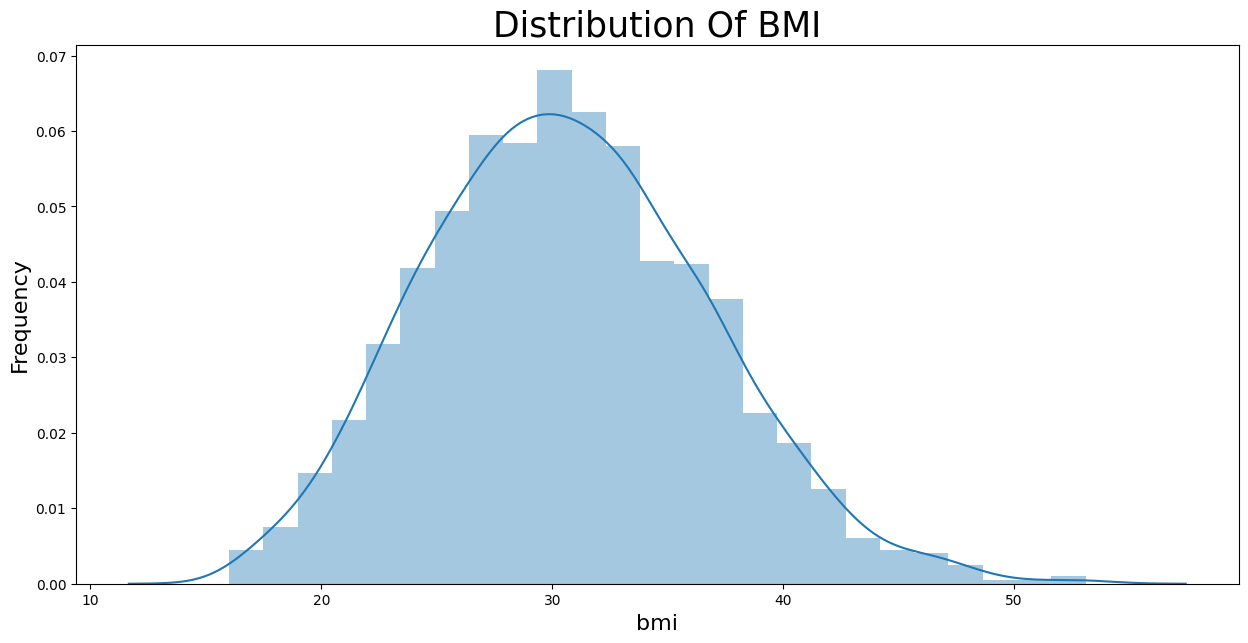

In [17]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of BMI",fontsize=25)
g=sns.distplot(df['bmi'])
g.set_xlabel("bmi", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

Text(0, 0.5, 'count')

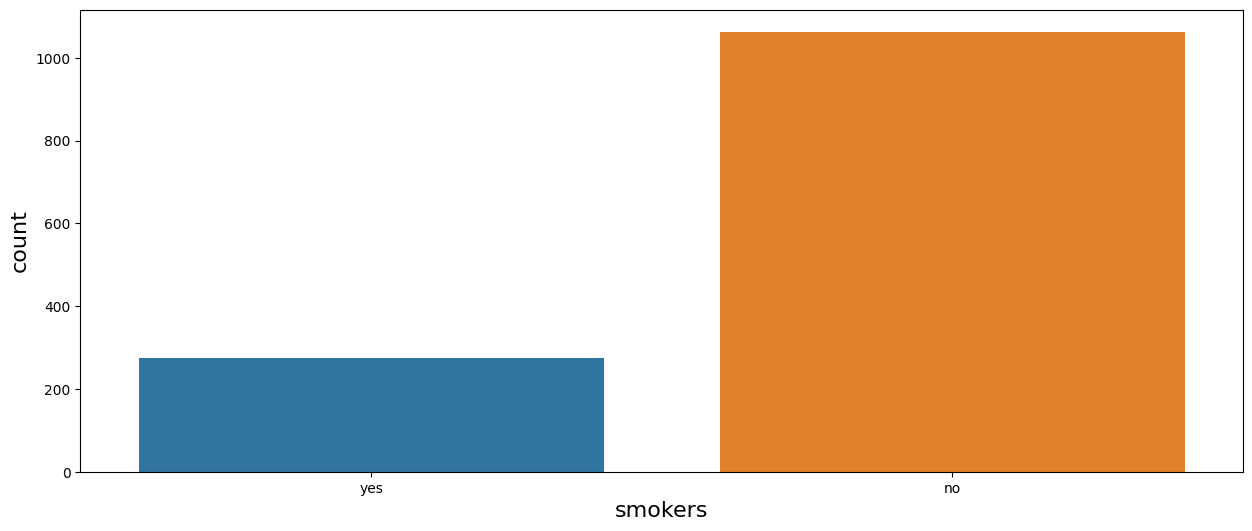

In [18]:
plt.figure(figsize=(15,6))
bp2=sns.countplot(x='smoker',data=df)
bp2.set_xlabel("smokers", fontsize=16)
bp2.set_ylabel("count", fontsize=16)

Text(0, 0.5, 'smokers')

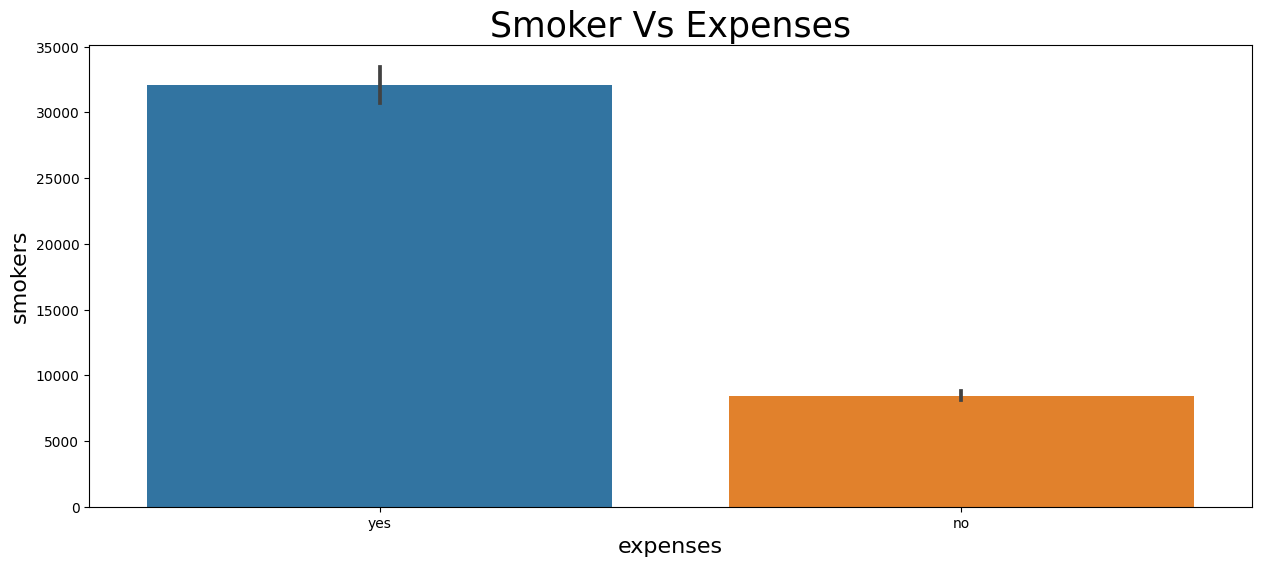

In [19]:
plt.figure(figsize=(15,6))
plt.title("Smoker Vs Expenses",fontsize=25)
bp3=sns.barplot(x='smoker',y='expenses',data=df)
bp3.set_xlabel("expenses", fontsize=16)
bp3.set_ylabel("smokers", fontsize=16)

Text(0, 0.5, 'expenses')

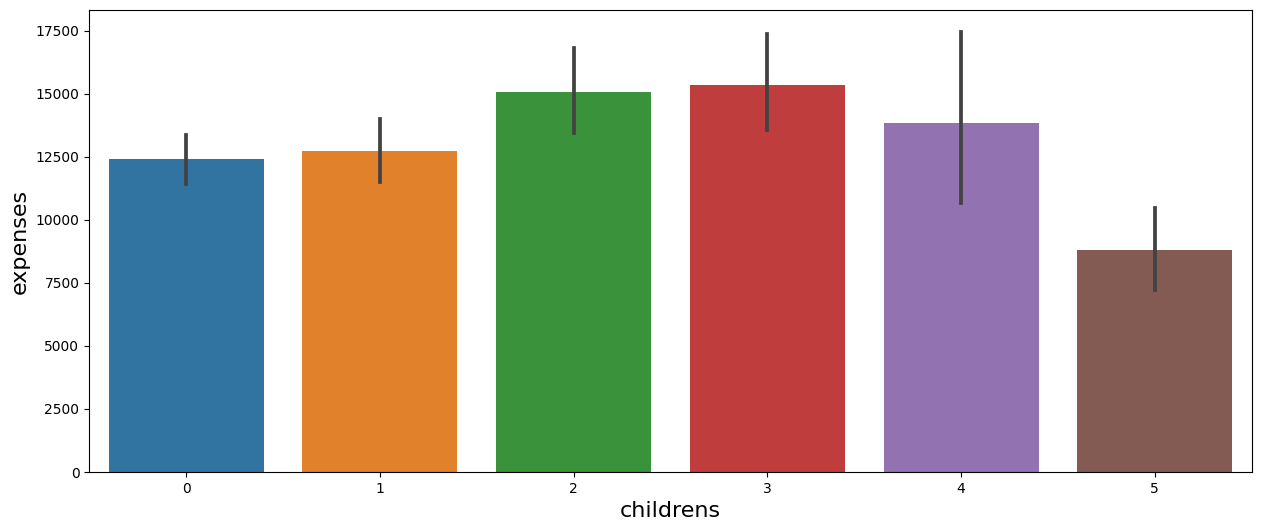

In [21]:
plt.figure(figsize=(15,6))
bp4=sns.barplot(x='children',y='expenses',data=df)
bp4.set_xlabel("childrens", fontsize=16)
bp4.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'expenses')

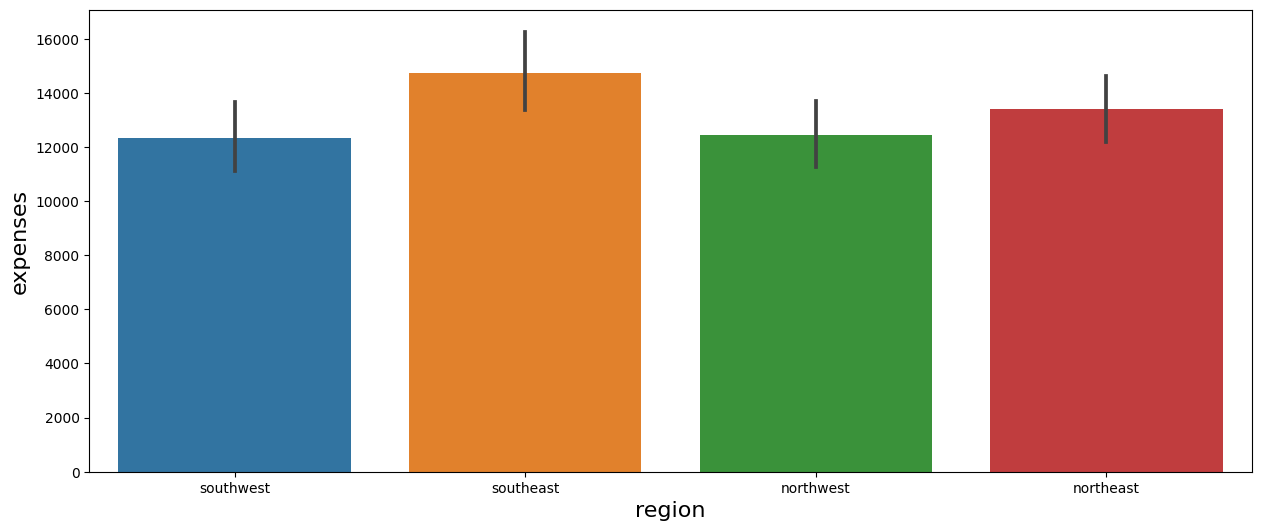

In [23]:
plt.figure(figsize=(15,6))
bp5=sns.barplot(x='region',y='expenses',data=df)
bp5.set_xlabel("region", fontsize=16)
bp5.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'expenses')

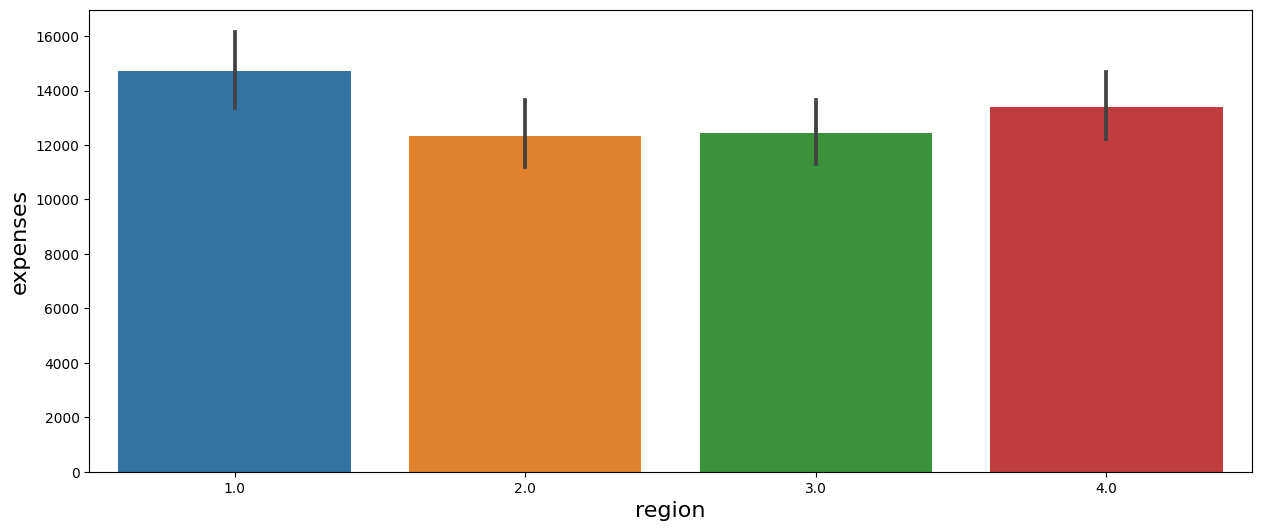

In [46]:
plt.figure(figsize=(15,6))
bp5=sns.barplot(x='region',y='expenses',data=df)
bp5.set_xlabel("region", fontsize=16)
bp5.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'count')

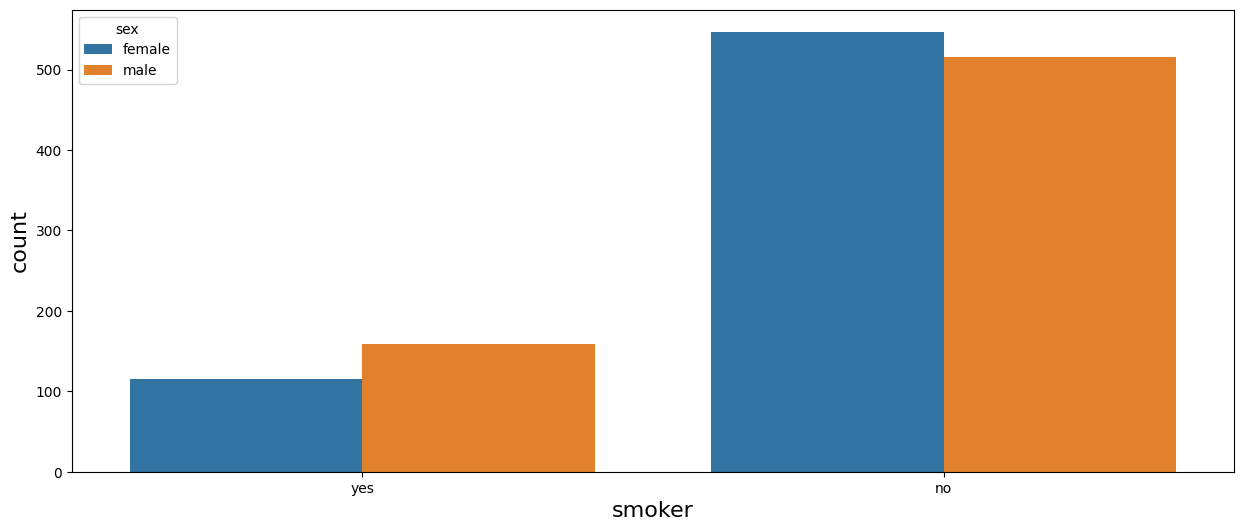

In [25]:
plt.figure(figsize=(15,6))
bp6=sns.countplot(x=df.smoker,hue=df.sex)
bp6.set_xlabel("smoker", fontsize=16)
bp6.set_ylabel("count", fontsize=16)

Text(0, 0.5, 'expenses')

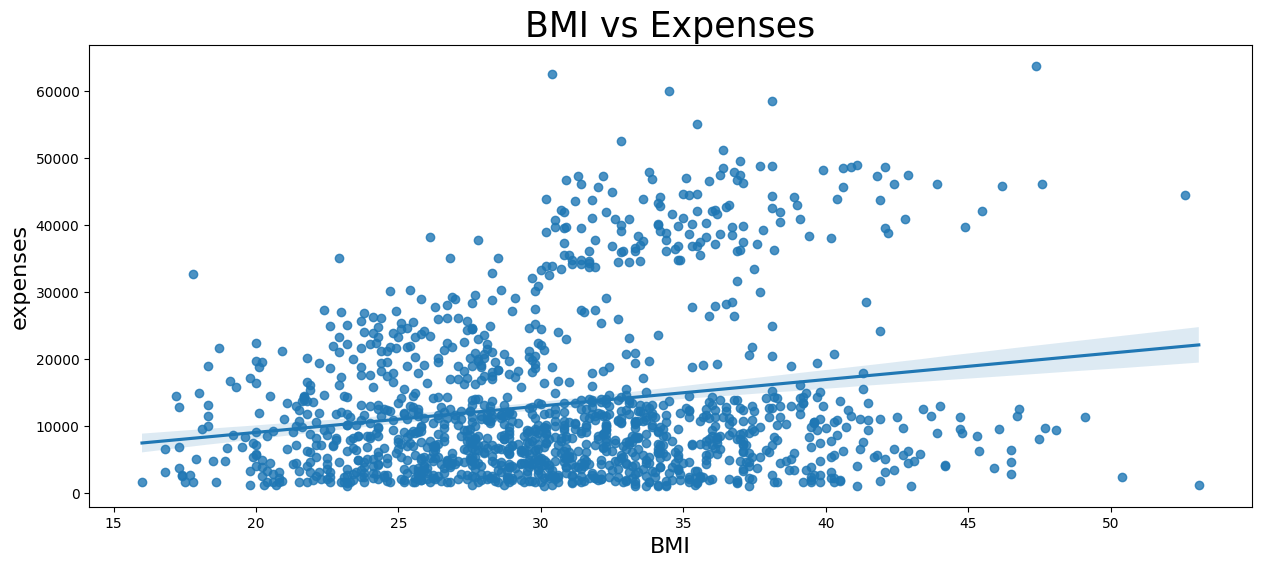

In [26]:
plt.figure(figsize=(15,6))
plt.title("BMI vs Expenses",fontsize=25)
bp8=sns.regplot(x='bmi',y='expenses',data=df)
bp8.set_xlabel("BMI", fontsize=16)
bp8.set_ylabel("expenses", fontsize=16)

In [45]:
df.expenses.corr(df.smoker)

0.7872343667298232

In [40]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,-0.025587,0.006833,0.298308
sex,-0.019814,1.000000,0.046405,0.017848,0.076596,-0.013179,0.058045
bmi,0.109414,0.046405,1.000000,0.012641,0.003964,-0.262769,0.198637
children,0.041536,0.017848,0.012641,1.000000,0.007331,0.001533,0.067389
smoker,-0.025587,0.076596,0.003964,0.007331,1.000000,-0.038697,0.787234
region,0.006833,-0.013179,-0.262769,0.001533,-0.038697,1.000000,-0.039144
expenses,0.298308,0.058045,0.198637,0.067389,0.787234,-0.039144,1.000000


<Axes: >

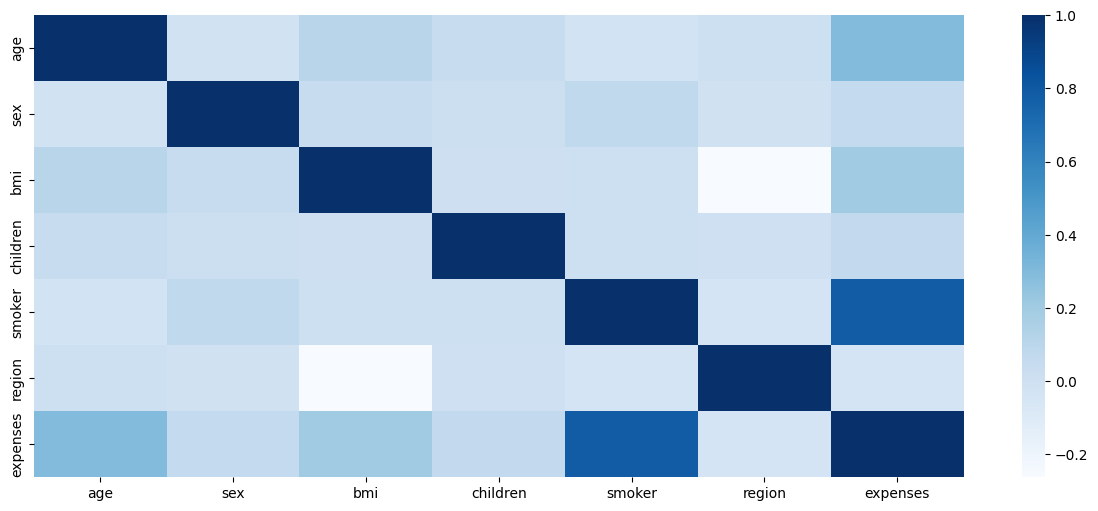

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),fmt='.1g',cmap='Blues')

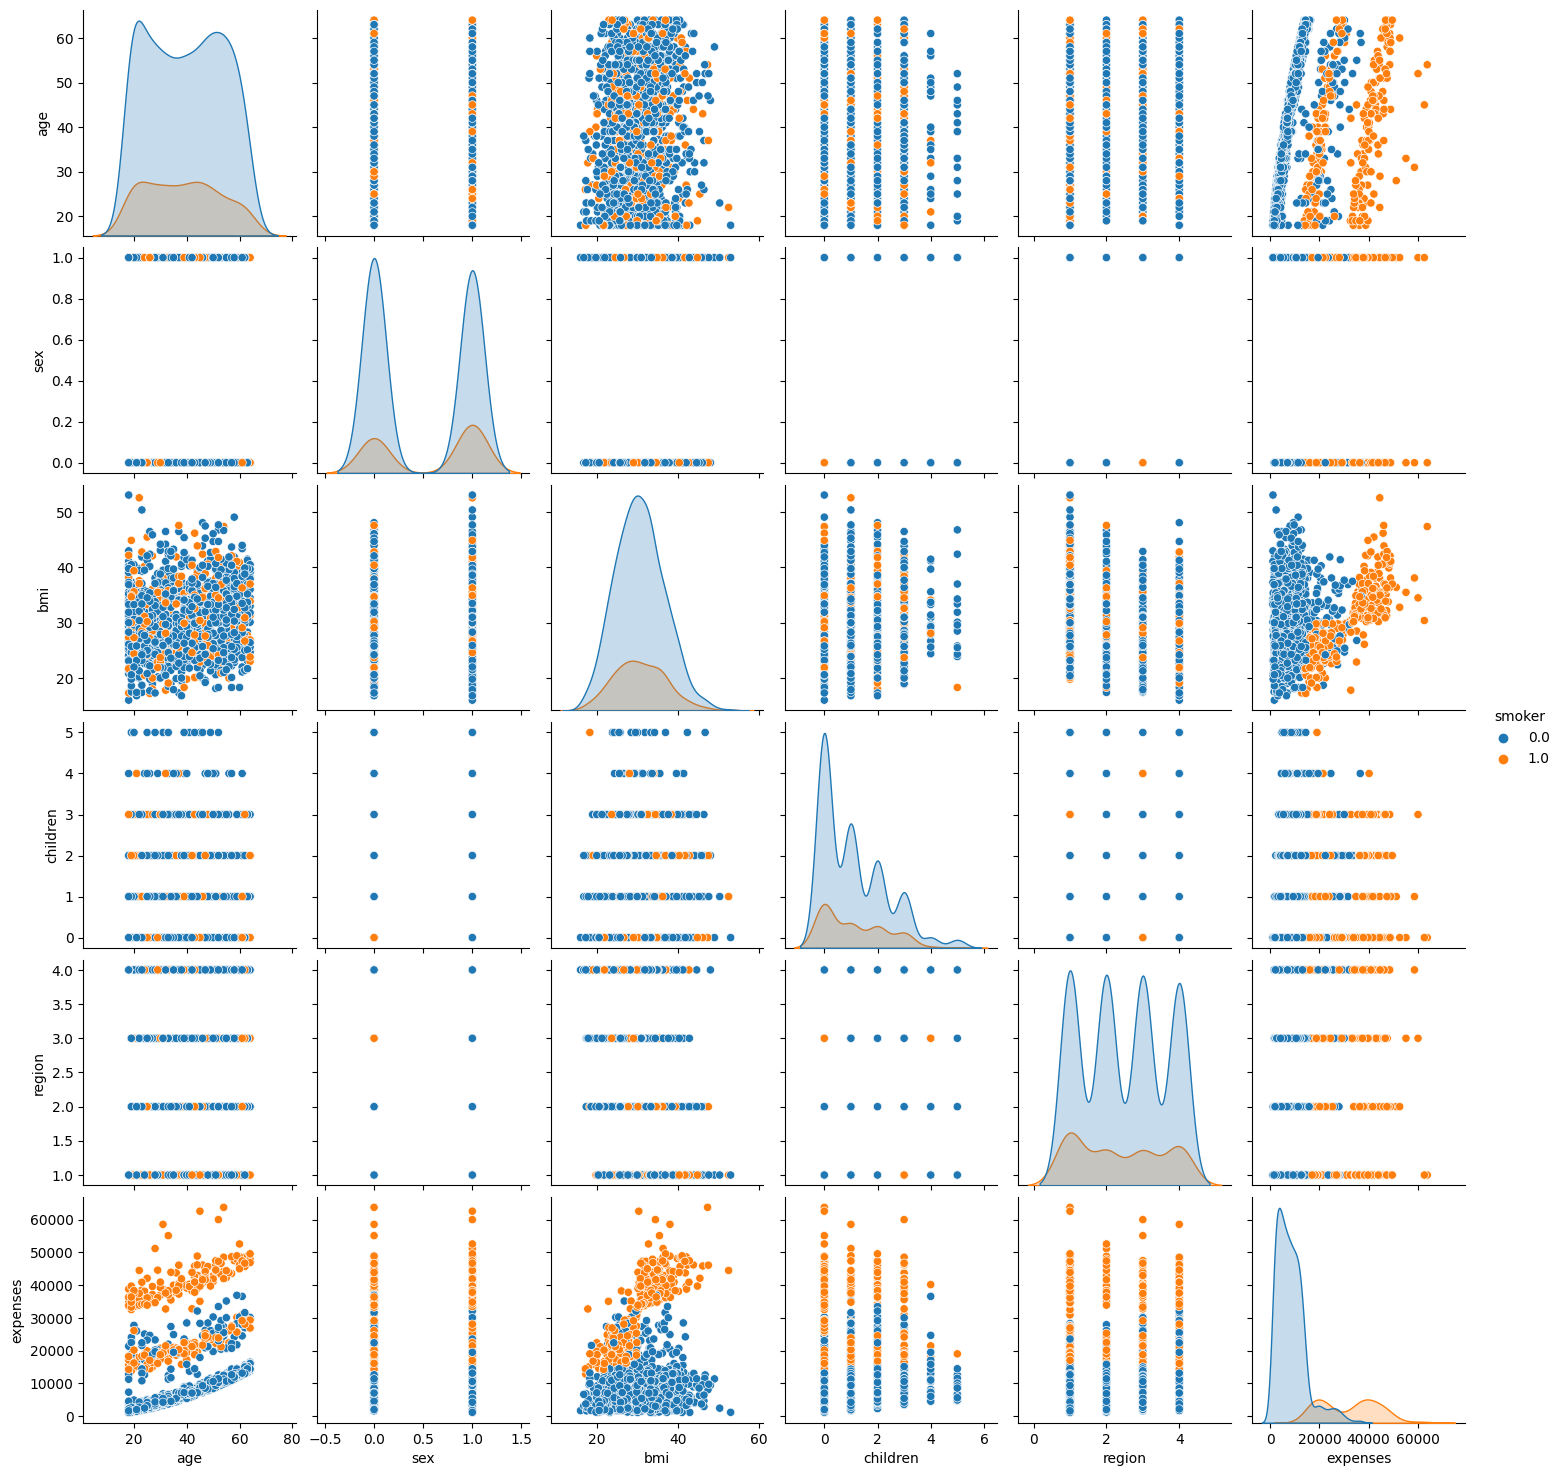

In [43]:
sns.pairplot(data=df,hue='smoker')